In [1]:
import matplotlib.pyplot as plt


In [2]:
# input data from user
size = int(input("\nEnter number of points to be evaluated:"))


Enter number of points to be evaluated:10


In [3]:
# getting the y coordinates for the data
print("Enter the y coordinates: ")
Y = list(map(float, input().split()))

Enter the y coordinates: 
0 0 0 0 0 1 1 1 1 1


In [4]:
# getting the x1 coordinates
print("Enter the X1 coordinates: ")
X1 = list(map(float,input().split()))

Enter the X1 coordinates: 
2.7810836	1.465489372	3.396561688  1.38807019  3.06407232	7.627531214	5.332441248	6.922596716	8.675418651  7.673756466


In [11]:
# getting the x2 coordinates
print("Enter the X2 coordinates: ")
X2 = list(map(float,input().split()))

Enter the X2 coordinates: 
2.550537003	2.362125076	4.400293529	1.850220317	3.005305973	2.759262235	2.088626775	1.77106367	-0.2420686549		3.508563011


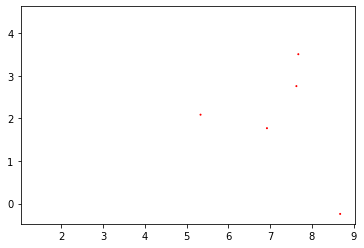

In [35]:
plt.scatter(X1,X2,Y,color='red')

In [47]:
# getting the number of iterations
iter = int(input("Enter the number of iterations: "))

Enter the number of iterations: 5


In [51]:
#for this data set, the output = b0 + b1*X1 + b2*X2 where b0, b1 and b2 are all coefficients which will be manipulated based on the data set to reach the best value. To start, we will take b0=0,b1=0 and b2=0. Alpha(learning rate) will be taken as 0.3. Since b0 does not have an initial x value input, it has simply been multiplied by 1.

for i in range(iter):
    pred = 1/(1+(2.71828**(-(b0+(b1*X1[i])+(b2*X2[i]))))
    b0 = b0 + 0.3*(Y[i]-pred)*pred*(1-pred)*1
    b1 = b1 + 0.3*(Y[i]-pred)*pred*(1-pred)*X1[i]
    b2 = b2 + 0.3*(Y[i]-pred)*pred*(1-pred)*X2[i]
    

SyntaxError: invalid syntax (<ipython-input-51-4047d4307615>, line 5)

In [49]:
print(b0,b1,b2)

0 0 0


In [52]:
#using the final coefficients obtained, the final probabilities for each of the inputs can be determined
for i in range(len(Y)):
    prob = (1/(1+(2.71828**(-(b0+(b1*X1[i])+(b2*X2[i]))))))*100
    print(prob)

50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
